## 支持向量机特性
支持向量机在机器学习中多才多艺, 能够做线性或非线性分类,回归任务甚至是局外检测(outlier detection)   
SVM 非常适合做复杂的,中小规模的分类任务

## Liner SVM Classification

### How SVM works

![](./images/SVM/LargeMarginClassification.png)

上图的两个类可以被一条直线划分, 形如被直线划分的称为线性可分(*linearly separable*)   
左图, 显示了3种线性划分的直线.   
虚线的没有很好的对数据集划分   
其余两条线虽然做对了划分, 但是对于两类的区分较模糊, 数据点距离分类边界太近了, 对于新数据极有可能误判.    
左图展示了 SVM 的划分策略, 正确的划分并且距离两类的边界尽可能的远     
这种产生*widest possible street*的划分称为$Large\ margin\ classification$    
*widest possible street*仅有两类的边界确定, 因此边界上的点比较特殊,这些*instances*就是支持向量(**support vector**)

**TIPS:**
正是由于SVM能根据数据点分布做出 widest possible street 的划分, 因此对于数据集做 feature scaling 就尤为重要   
![](./images/SVM/SensitiveToFeatureScaling.png)

如上图, 左图在未规约scale时, 分类边界趋于水平且区分不大   
右图, 可见在两个轴scale差别不大下, street更宽

## Soft Margin Classification 

引入硬间隔支持向量机Hard margin SVM,   
其严格定义数据集分布在street的一侧(而非简单的在划分一侧)       
这样的分类是我们所期望的, 但是往往数据集不能如此做划分, 假设有一个outlier就能让widest possible street变得很窄,   
或者有些根本就是线性不可分的   
因此我们的模型需要有更大的灵活性, 引入软间隔(soft margin Classification),    
在最大化widest possibile street和间隔违背(margin violation)中寻求平衡   

在sklearn 中我们用超参`C`控制 balance, 当C越大时, 产生的street越窄, 但是更少的间隔违背(有更严的错误容忍)     
有时候然而尽管会产生margin violation, 但如果落在正确的一侧, 仍然是较好的划分      
![](https://s1.ax1x.com/2018/05/10/C0eL6g.png)
如模型发生过拟合, 考虑减少C值    

In [2]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target']==2).astype(np.float64)

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

# 使用SVC构造, 效能较低, 尤其在大数据集上, 这里推荐用损失函数为hinge的随机梯度下降
# svm_clf = Pipeline([("scaler", StandardScaler()), ("linear_svc", SVC(kernel="linear", C=1))])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [9]:
# 使用SGD训练Linear SVC的核外算法
from sklearn.linear_model import SGDClassifier
m = len(X)
C = 1
svm_clf = Pipeline([("scaler", StandardScaler()), ("linear_svc", SGDClassifier(loss="hinge", alpha=1/(m*C)))])
svm_clf.fit(X, y)
# 与直接LinearSVC相比收敛速度慢, 但是优势在核外算法不会超内存, 有利于在线分类任务

150


/Users/hu-osx/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', SGDClassifier(alpha=0.006666666666666667, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

## Nonlinear SVM Classification
针对那些线性不可分    
解决之道: 像多项式回归一样, 增加多项式特征项    
一个简单的例子    
![](https://s1.ax1x.com/2018/05/10/C0uCyF.png)


左图线性不可分, 右图添加一些$x_2=(x_1)^2$, 数据集变成线性可分

In [58]:
# 一个多项式特征解决非线性划分
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.pylab import plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

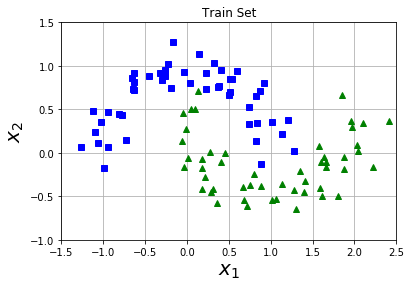

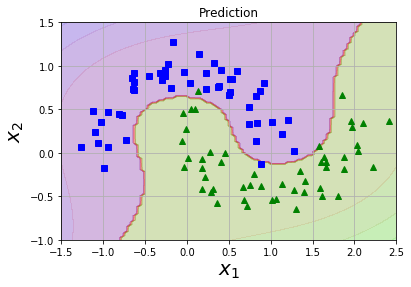

In [85]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs') # 切片操作用标记筛选,相当于布尔索引?!
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes) # 坐标轴范围
    plt.grid(True, which='both') # 显示网格
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    # x,y,z z为(x,y)点值
    
plt.title("Train Set")
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()
plt.title("Prediction")
plot_predictions(polynomial_svm_clf,[-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

>上述方法显而易见的缺陷是添加如此多的特征, 训练起来会爆内存, 为此我们引入一些核技巧

## Polynomial Kernel
多项式核, 好处显而易见, 然而会有huge number of features    
在做多项式SVM时这里引入一种数学核技巧($kernel\ trick$)    
该技巧实际上并不会让你加入任何更多的特征....   
但能取得与加入一些高维特征后一样的效能

In [3]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
        # 超参coef0 控制受高次影响较低次影响的
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

## Adding Similarity Featuers
除了添加高维特征外我们还可以增加相似特征处理非线性分类任务    
引入相似函数去描述和给定的landmark相比, 这些特征有多类似  
>高斯径向基/核函数($Gaussian\ Radial\ Basis\ Function$)       
简称为$Gaussian\ RBF$,    $\displaystyle \phi(\mathrm{x}, \ell)=e^{-\gamma||(\mathrm{x}-\ell)||^2}$

![](https://s1.ax1x.com/2018/05/10/C0GBi4.png)

高斯径向基函数求出相似特征, 比如左图增加$x_1=-2, x_2=2$为landmarks, 抛弃旧有特征, 在正确选择landmark下, 原有的数据集变得线性可分,   
比如x=(-1,0) 经过变换为(e^(-\gamma*1), e^(\gamma*))如何选择合适的landmark呢? 一种尝试是在每个instance都添加landmark, 最终总能达成线性可分

## Gaussian RBF Kernel
同样, 如果在每个样例上增加landmark计算开销很大, 这里我们采用核技巧, 实际上仍然不会添加任何特征

In [87]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

>超参$\gamma, C$的解释
![](https://s1.ax1x.com/2018/05/13/CDl8HO.png)

当$\gamma$变大时, 钟形曲线变窄, 意味着, landmark影响范围变小, 造成决策边界不规则, 曲线在单样例附近摆动.   
$\gamma $ 在这里起到的作用像正则化的超参数, 如果迷行过拟合应该减少其.      
除高斯核外还有正对文本的String Kernel, 不过用的比较少, 针对DNA序列

as a rule of thumb根据经验, 默认使用`LinearSVC`,    
在数据集不大的情况下, 使用高斯核在大多数情况下表现不错,    
如果有多余的算力和时间, 当然可以用网格搜索

## Computational Complexity

`LinearSVC` 无核技巧 复杂度$O(m \times n)$   
`SVC` 核技巧 介于$O(m^2\times n)和O(m^3 \times n)$

## SVM Regression
SVM 回归任务

在做分类任务时, 变目标为, 在street中fit 尽可能多的样例, street的宽度由超参$\varepsilon $控制   
![](https://s1.ax1x.com/2018/05/13/CD1QiQ.png)

多项式核SVR

![](https://s1.ax1x.com/2018/05/13/CD1lGj.png)

当C变大时, 间隔边界更拟合数据, 容纳更多

**TIPS:** SVMs更适合 *outlier detection*

## Under the Hood

>**揭开引擎盖, 一探究竟**

### Decision Function and Predictions

### Training Objective

训练目标: 对于硬间隔来说, 我们要求得一个尽可能大的间隔, 同时间隔内部没有点   
先考虑如何尽可能大间隔,    
考虑decision function的斜率$||\mathbf{w}||$, 如果我们对其除以2, 则$f=\pm 1$的位置将变远,也就是间隔变大了,   
如此我们有直观的印象: 在约束下最小化$\mathbf{w}$

#### Hard Margin Objective

$\displaystyle \underset{\mathbf{w}, b}{\textrm{minmize}} \ \ \frac{1}{2}\mathbf{w}^T\cdot \mathbf{w}$      
$\displaystyle \mathrm{subject\ to}\ \ \ t^{(i)}(\mathbf{w}^T\cdot \mathbf{x}^{(i)}+b)\geqslant 1,\ \  for\ i=1,2,\cdot \cdot \cdot,m$   
其中 $\begin{cases} t^{(i)}=-1& \text{ if } y^{(i)}=0 \\ t^{(i)}=1& \text{ if } y^{(i)}=1 \end{cases}$

#### Soft Margin Objective

为了达到软间隔的目标, 引入松弛变量$(slack\ variance\ \zeta^{(i)}\geqslant 0)$    
对于每一个样例, $\zeta^{(i)}$表示该样例有多去违背间隔的程度    
然而在前进的路上我们遇到了冲突, 既想着尽可能小的$\zeta$去产生间隔违背, 又想着最小化$\frac{1}{2}\mathbf{w}^T\cdot \mathbf{w}$来产生尽可能大的间隔   
为此我们引入了超参数$C$ 表示这种$trade-off$    
目标:     
$\displaystyle \underset{\mathbf{w}, b, \zeta}{\textrm{minmize}} \ \ \frac{1}{2}\mathbf{w}^T\cdot \mathbf{w}+C\sum_{i=1}^{m} \zeta^{(i)}$    
$\displaystyle subject\ to\ \ \ t^{(i)}(\mathbf{w}^T\cdot \mathbf{x}^{(i)}+b)\geqslant 1-\zeta^{(i)},\ \  and\ \ \zeta^{(i)}\geqslant 0\ \ \ for\ i=1,2,\cdot \cdot \cdot,m$

### Quadratic Programming 二次规划   
**补充内容 Convex Optimization[Stephen Boyd]**       
硬间隔和软间隔问题都是属于线性约束下凸二次优化问题, $Quadratic\ Programming(QP)$  
典型的二次规划问题:    
$\underset{\mathbf{p}}{\mathrm{Minimize}}: \displaystyle \frac{1}{2}\mathbf{P}^T\cdot \mathbf{H}\cdot \mathbf{p} + \mathbf{f}^T\cdot \mathbf{P}$  目标函数理解为二次型函数加上正则化罚项    
$\mathrm{subject\ to:}$  $\mathbf{A}\cdot \mathbf{p} \leq \mathbf{b}$

## The Dual Problem
对偶问题的解给出了原问题$(promal\ problem)$解的下界   
线性SVM对偶形式的目标函数   
$\displaystyle \underset{\alpha}{\mathrm{minimize}} \frac{1}{2}\sum_{i=1}^{m} \sum_{j=1}^{m} \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} \mathrm{x}^{(i)^T}\cdot \mathrm{x}^{(j)} -\sum_{i=1}^m\alpha^{(i)}$    
$\mathrm{subject\ to}:\ \alpha^{(i)}\geqslant 0, for\ i=1,2,\cdot \cdot \cdot ,m$

### 下面给出该对偶问题的求解

硬间隔问题一般性拉格朗日    
$\displaystyle \mathscr{L}(\mathbf{w},b,\alpha)=\frac{1}{2}\mathbf{w}^T\cdot \mathbf{w}-\sum_{i=1}^m\alpha^{(i)}(t^{(i)}(\mathbf{w}^T\cdot \mathbf{x}^{(i)}+b)-1)$   
$\mathrm{with\ \alpha^{(i)}}\geqslant 0,\ \  for\ i=1,2,\cdot \cdot \cdot,m$      
</br>  
$stationart\ point\ (\hat{\mathbf{w}},\hat{b},\hat{\alpha})$满足一定的条件, 称为$KKT$条件    
</br> 
- 满足约束, 即$\displaystyle t^{(i)}(\hat{(\mathbf{w})}^T\cdot \mathbf{x}^{(i)}+\hat{b})\geq 1$   
- $\hat{\alpha}^{(i)}\geq 0$    
- 要么$\hat{\alpha}^{(i)}= 0$,要么第$i$个约束必须是有效约束$(avtive\ constraint) $ 也就是$\displaystyle t^{(i)}(\hat{(\mathbf{w})}^T\cdot \mathbf{x}^{(i)}+\hat{b})= 1$这种情况为互补松弛$(complementary\ slackness)$, 而这指出要么拉格朗日乘子为$0$, 要么第$i$个约束靠在边界上, 这些就是支持向量    
</br>
$\displaystyle \bigtriangledown_\mathbf{w}\mathscr{L}(\mathbf{w},b,\alpha)=\mathbf{w}-\sum_{i=1}^m\alpha^{(i)}t^{(i)}\mathbf{x}^{(i)}$   
</br>
$\displaystyle \frac{\partial }{\partial b}\mathscr{L}(\mathbf{w},b,\alpha)=-\sum_{i=1}^m\alpha^{(i)}t^{(i)}$    
All equal to $0$    
so we can deriver that    
$\displaystyle \mathbf{w}=\sum_{i=1}^m\alpha^{(i)}t^{(i)}\mathbf{x}^{(i)}$    
$\displaystyle \sum_{i=1}^m\alpha^{(i)}t^{(i)}=0$   
以上细节推导记及核函数,预测于笔记本中详述   
与<SVM三种境界> 相比, 由 $\alpha$ 求得$b$的过程有些差别, 在handson-ml上采取的是在全体数据集上的平均, 
在SVM的三种境界上采取的是最大值最小值平均   

在线SVMs 使用了SGD的思想进行在线学习

## Hinge Loss

![](./images/SVM/hingeloss.png)